In [2]:
from pathlib import Path

import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [21]:
BASEDIR = Path.cwd().parent

print(BASEDIR)

df = pd.read_csv(BASEDIR / "data" / "adult.csv")

df.replace("?", pd.NA, inplace=True)
df.dropna(inplace=True)

correct_df = df[((df['salary'] == '<=50K') & (df['salary K$'] <= 50)) |
                ((df['salary'] == '>50K') & (df['salary K$'] > 50))]

inconsistent_rows = df[~df.index.isin(correct_df.index)]

if inconsistent_rows.empty:
    print("All data is consistent.")
else:
    print("Found inconsistent data:")
    print(inconsistent_rows)

C:\projects\py-adult-data-analysis
All data is consistent.


# Task 1
Print the count of men and women in the dataset.

In [10]:
sex_df = df["sex"].value_counts().reset_index()
print(sex_df)

      sex  count
0    Male  21790
1  Female  10771


# Task 2
Find the average age of men in dataset

In [13]:
male_df = df[df["sex"] == "Male"]
avg_age = male_df["age"].mean()
print(avg_age)


39.43354749885268


# Task 3
Get the percentage of people from Poland (native-country)

In [15]:
poland_df = df[df["native-country"] == "Poland"]

polish_ppl = poland_df.shape[0]
total_ppl = df.shape[0]

percentage = round((polish_ppl / total_ppl) * 100, 2)

print(f"{percentage}%")

0.18%


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [28]:
higher_salary_df = df[df["salary"] == ">50K"]
avg_age = higher_salary_df["age"].mean().round(2)
dev_age = higher_salary_df["age"].std().round(2)

print(f"Average age of people who earn >50K/year: {avg_age}")
print(f"Standard deviation of ages of people who earn >50K/year: {dev_age}")

lesser_salary_df = df[df["salary"] == "<=50K"]
avg_age = lesser_salary_df["age"].mean().round(2)
dev_age = lesser_salary_df["age"].std().round(2)

print(f"Average age of people who earn <=50K/year: {avg_age}")
print(f"Standard deviation of ages of people who earn <=50K/year: {dev_age}")


Average age of people who earn >50K/year: 43.96
Standard deviation of ages of people who earn >50K/year: 10.27
Average age of people who earn <=50K/year: 36.61
Standard deviation of ages of people who earn <=50K/year: 13.46


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [32]:
higher_education = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]

high_education_high_salary = higher_salary_df[higher_salary_df["salary"] == ">50K"]

print(f"Number of people without higher education and with high salary: {high_education_high_salary.shape[0]}")

Number of people without higher education and with high salary: 7508


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [34]:
age_stats_by_education = df.groupby('education')['age'].describe()
print(age_stats_by_education)

               count       mean        std   min   25%   50%   75%   max
education                                                               
10th           820.0  37.897561  16.225795  17.0  23.0  36.0  52.0  90.0
11th          1048.0  32.363550  15.089307  17.0  18.0  28.5  43.0  90.0
12th           377.0  32.013263  14.373710  17.0  19.0  28.0  41.0  79.0
1st-4th        151.0  44.622517  14.929051  19.0  33.0  44.0  56.0  81.0
5th-6th        288.0  41.649306  14.754622  17.0  28.0  41.0  53.0  82.0
7th-8th        557.0  47.631957  15.737479  17.0  34.0  49.0  60.0  90.0
9th            455.0  40.303297  15.335754  17.0  28.0  38.0  53.0  90.0
Assoc-acdm    1008.0  37.286706  10.509755  19.0  29.0  36.0  44.0  90.0
Assoc-voc     1307.0  38.246366  11.181253  19.0  30.0  37.0  45.0  84.0
Bachelors     5044.0  38.641554  11.577566  19.0  29.0  37.0  46.0  90.0
Doctorate      375.0  47.130667  11.471727  24.0  39.0  47.0  54.0  80.0
HS-grad       9840.0  38.640955  13.067730  17.0  2

# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [36]:
married_men = male_df[male_df['marital-status'].str.startswith('Married')]

not_married_men = male_df[~male_df['marital-status'].str.startswith('Married')]

married_salary_distribution = married_men['salary'].value_counts()
not_married_salary_distribution = not_married_men['salary'].value_counts()

print("Married men salary distribution:")
print(married_salary_distribution)

print("\nNon-married men salary distribution:")
print(not_married_salary_distribution)

Married men salary distribution:
salary
<=50K    7576
>50K     5965
Name: count, dtype: int64

Non-married men salary distribution:
salary
<=50K    7552
>50K      697
Name: count, dtype: int64


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [37]:
max_hours = df['hours-per-week'].max()

num_people_max_hours = df[df['hours-per-week'] == max_hours].shape[0]

print(f"The maximum hours per week someone works is: {max_hours} hours.")
print(f"Number of people who work {max_hours} hours per week: {num_people_max_hours}")

The maximum hours per week someone works is: 99 hours.
Number of people who work 99 hours per week: 78


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

Correlation matrix:
       Unnamed: 0  age  hours-per-week  salary K$
0               0   39              40         39
1               1   50              13         35
2               2   38              40         27
3               3   53              40         43
4               4   28              40         25
...           ...  ...             ...        ...
32556       32556   27              38         36
32557       32557   40              40        173
32558       32558   58              40         40
32559       32559   22              20         38
32560       32560   52              40        243

[30162 rows x 4 columns]


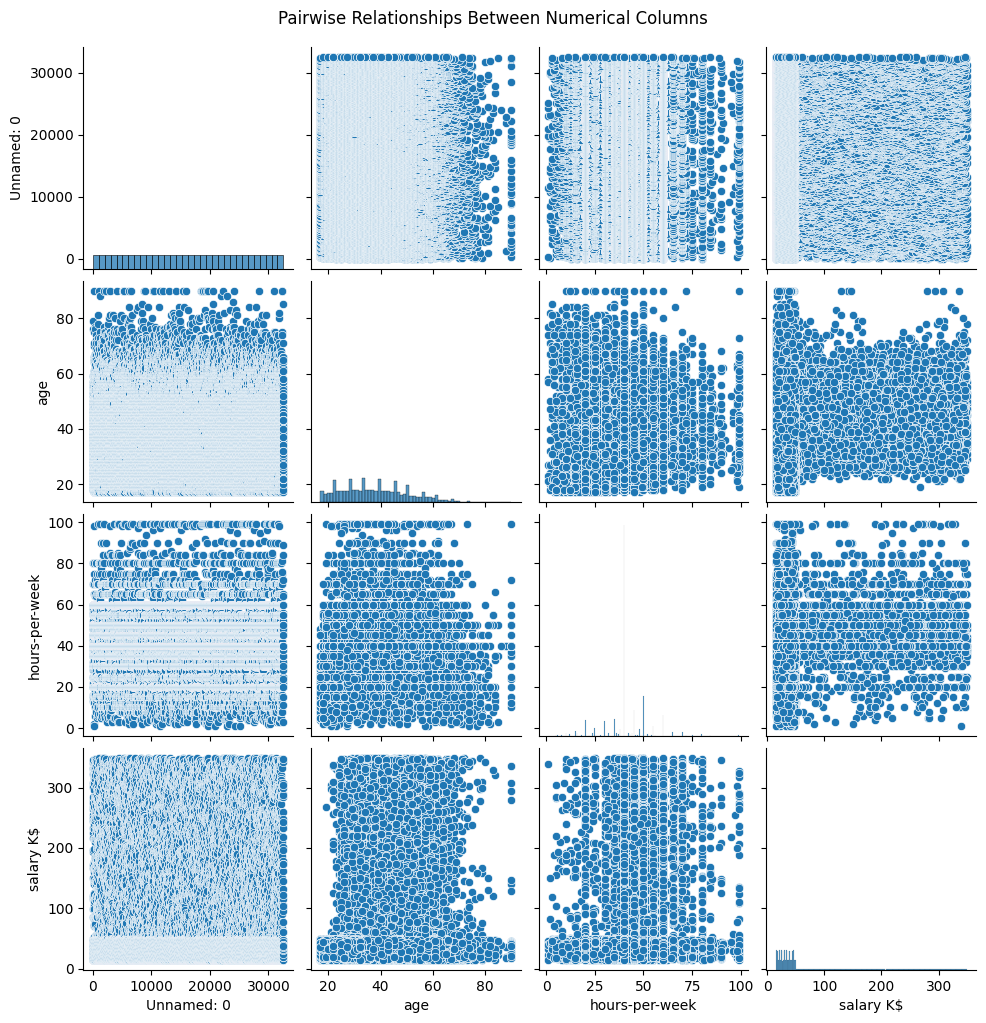

In [43]:
correlation_matrix = df.select_dtypes(include=["number"])

print("Correlation matrix:")
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot pairwise relationships
sns.pairplot(correlation_matrix)
plt.suptitle('Pairwise Relationships Between Numerical Columns', y=1.02)
plt.show()